In [121]:
import tensorflow as tf
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import numpy as np

In [54]:
import pandas_datareader as pdr
key="b022a2e19366d2879f6a14024c34d28b0c793dca"

In [55]:
df = pdr.get_data_tiingo('META', api_key=key)

<ipython-input-55-8492782c7472>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('META', api_key=key)


In [56]:
df.to_csv('META.csv')

In [57]:
import pandas as pd

In [58]:
df=pd.read_csv('META.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,META,2018-07-16 00:00:00+00:00,207.23,208.72,206.84,207.50,11078209,207.23,208.72,206.84,207.50,11078209,0.0,1.0
1,META,2018-07-17 00:00:00+00:00,209.99,210.46,204.84,204.90,15349892,209.99,210.46,204.84,204.90,15349892,0.0,1.0
2,META,2018-07-18 00:00:00+00:00,209.36,210.99,208.44,209.82,15334907,209.36,210.99,208.44,209.82,15334907,0.0,1.0
3,META,2018-07-19 00:00:00+00:00,208.09,209.99,207.76,208.77,11350429,208.09,209.99,207.76,208.77,11350429,0.0,1.0
4,META,2018-07-20 00:00:00+00:00,209.94,211.50,208.50,208.85,16241508,209.94,211.50,208.50,208.85,16241508,0.0,1.0


In [59]:
df1=df.reset_index()['close']
df1

0       207.23
1       209.99
2       209.36
3       208.09
4       209.94
         ...  
1251    291.99
1252    290.53
1253    294.10
1254    298.29
1255    309.34
Name: close, Length: 1256, dtype: float64

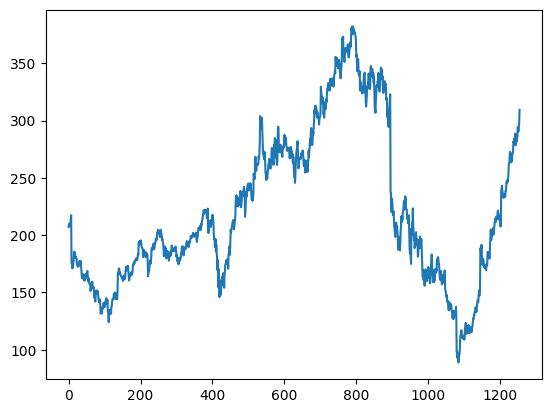

In [60]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [66]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [67]:
training_size,test_size

(816, 440)

In [69]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [70]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [71]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [72]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [73]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [75]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 203ms/step - loss: 0.1171 - val_loss: 0.0105
Epoch 2/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0120 - val_loss: 0.0101
Epoch 3/100
12/12 [==============================] - 3s 245ms/step - loss: 0.0067 - val_loss: 0.0052
Epoch 4/100
12/12 [==============================] - 3s 229ms/step - loss: 0.0040 - val_loss: 0.0053
Epoch 5/100
12/12 [==============================] - 3s 280ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 6/100
12/12 [==============================] - 2s 208ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 7/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 8/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 9/100
12/12 [==============================] - 2s 159ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 10/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0018 - val_lo

In [79]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


11/11 [==============================] - 0s 24ms/step


In [81]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [83]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.122748875437521

In [84]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.16343431379590354

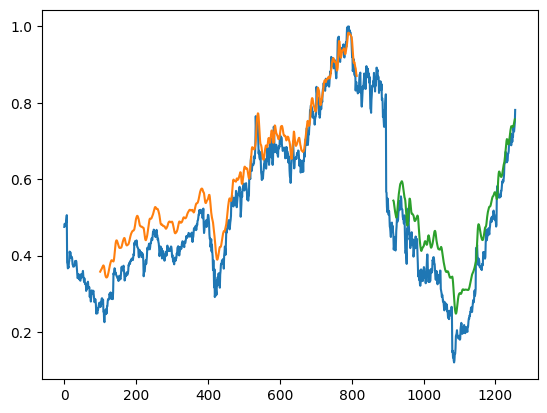

In [82]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [85]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [86]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [89]:
lst_output = []
n_steps = 100  # Adjusted to match the size of x_input
i = 0
while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, len(temp_input), 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)

0 day input [0.28359532 0.28032189 0.28345893 0.27783271 0.27493436 0.29334743
 0.28816449 0.2919494  0.32850274 0.32730931 0.32597947 0.32754799
 0.31636376 0.30893034 0.31367    0.35840693 0.37112558 0.39560814
 0.36382855 0.37133017 0.38616292 0.37814983 0.39339176 0.39929076
 0.3884816  0.38111638 0.39704027 0.40553074 0.41951103 0.42336414
 0.42899035 0.41794251 0.43369591 0.42909265 0.4260238  0.42653527
 0.44818768 0.45207488 0.44310703 0.4397995  0.43233198 0.42336414
 0.42275037 0.42240938 0.40454189 0.41085007 0.51028063 0.51628192
 0.52603403 0.51259931 0.50506359 0.4930951  0.49057183 0.49224264
 0.49258363 0.49159478 0.50083541 0.49408395 0.51130358 0.51116718
 0.5236642  0.5385481  0.5344222  0.54356054 0.53817301 0.54659529
 0.55846149 0.59034337 0.59198009 0.59948171 0.62638524 0.62638524
 0.62222525 0.6213046  0.5956627  0.59900433 0.60026597 0.62106591
 0.62198657 0.62890851 0.65782385 0.65499369 0.66634842 0.65717598
 0.66822382 0.68135166 0.64636683 0.67562315 0.669

In [118]:
day_new=np.arange(1,100)
day_pred=np.arange(100,130)

In [102]:
import matplotlib.pyplot as plt

In [113]:
len(df1)

1256

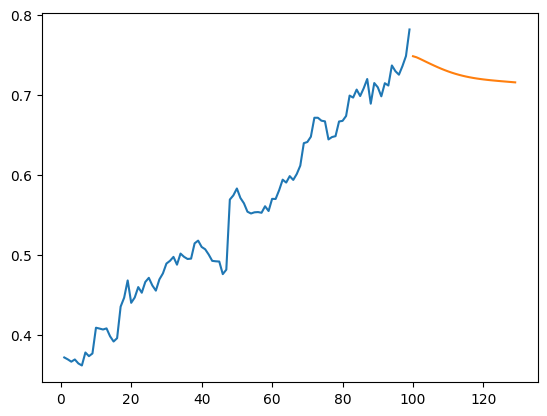

In [119]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

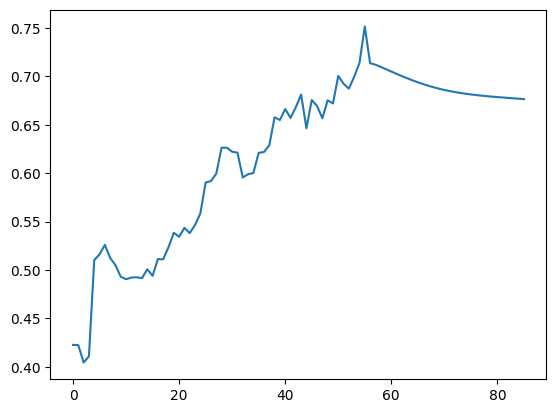

In [110]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [111]:
df3=scaler.inverse_transform(df3).tolist()

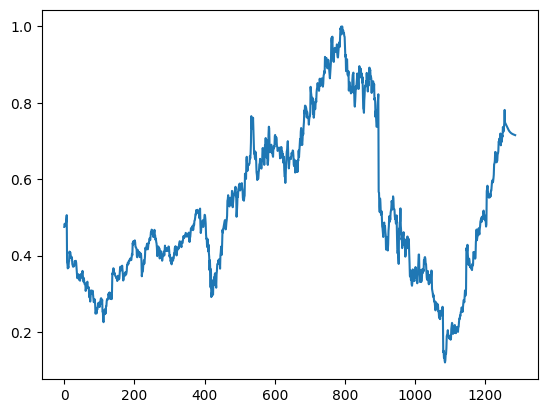

In [112]:
plt.plot(df3)